# Overview

In [25]:
# Load in packages and data
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
import numpy as np

harbor = pd.read_csv('data/harbor_hourly_gen_emissions_2019.csv')
harbor = harbor.fillna(0)
profiles = pd.read_csv('data/gen_profiles.csv')
resources = pd.read_csv('data/resources.csv')

ee_cost_type_utility_side = pd.read_csv('data/resource_projected_costs_ee_utilitycosts.csv')
ee_cost_type_total_cost = pd.read_csv('data/resource_projected_costs_ee_totalcosts.csv')

storage = pd.read_csv('data/storage.csv')
ee_resource_potential = pd.read_csv('data/ee_resource_potential_2020_2030.csv')
ladwp_marginal_co2 = pd.read_csv('data/WattTime_MOER/LDWP_MOERv3_CO2_2019.csv')
ladwp_marginal_co2['date'] = pd.to_datetime(ladwp_marginal_co2['timestamp_utc']).dt.date
ladwp_marginal_co2['hour'] = pd.to_datetime(ladwp_marginal_co2['timestamp_utc']).dt.hour
ladwp_marginal_co2 = ladwp_marginal_co2.groupby(['date','hour']).mean(['moer (lbs CO2/MWh)']).reset_index()

ladwp_marginal_healthdamages = pd.read_csv('data/WattTime_MOER/LDWP_healthdamage_moer.csv')

health_costs_emissions_la = pd.read_csv('data/pollutant_health_impacts/COBRA_LADWPplants_healthCosts.csv')



## Harbor peaker power plant properties
Shown in the next cell are the generation profile from the 2019 Harbor peaker plant

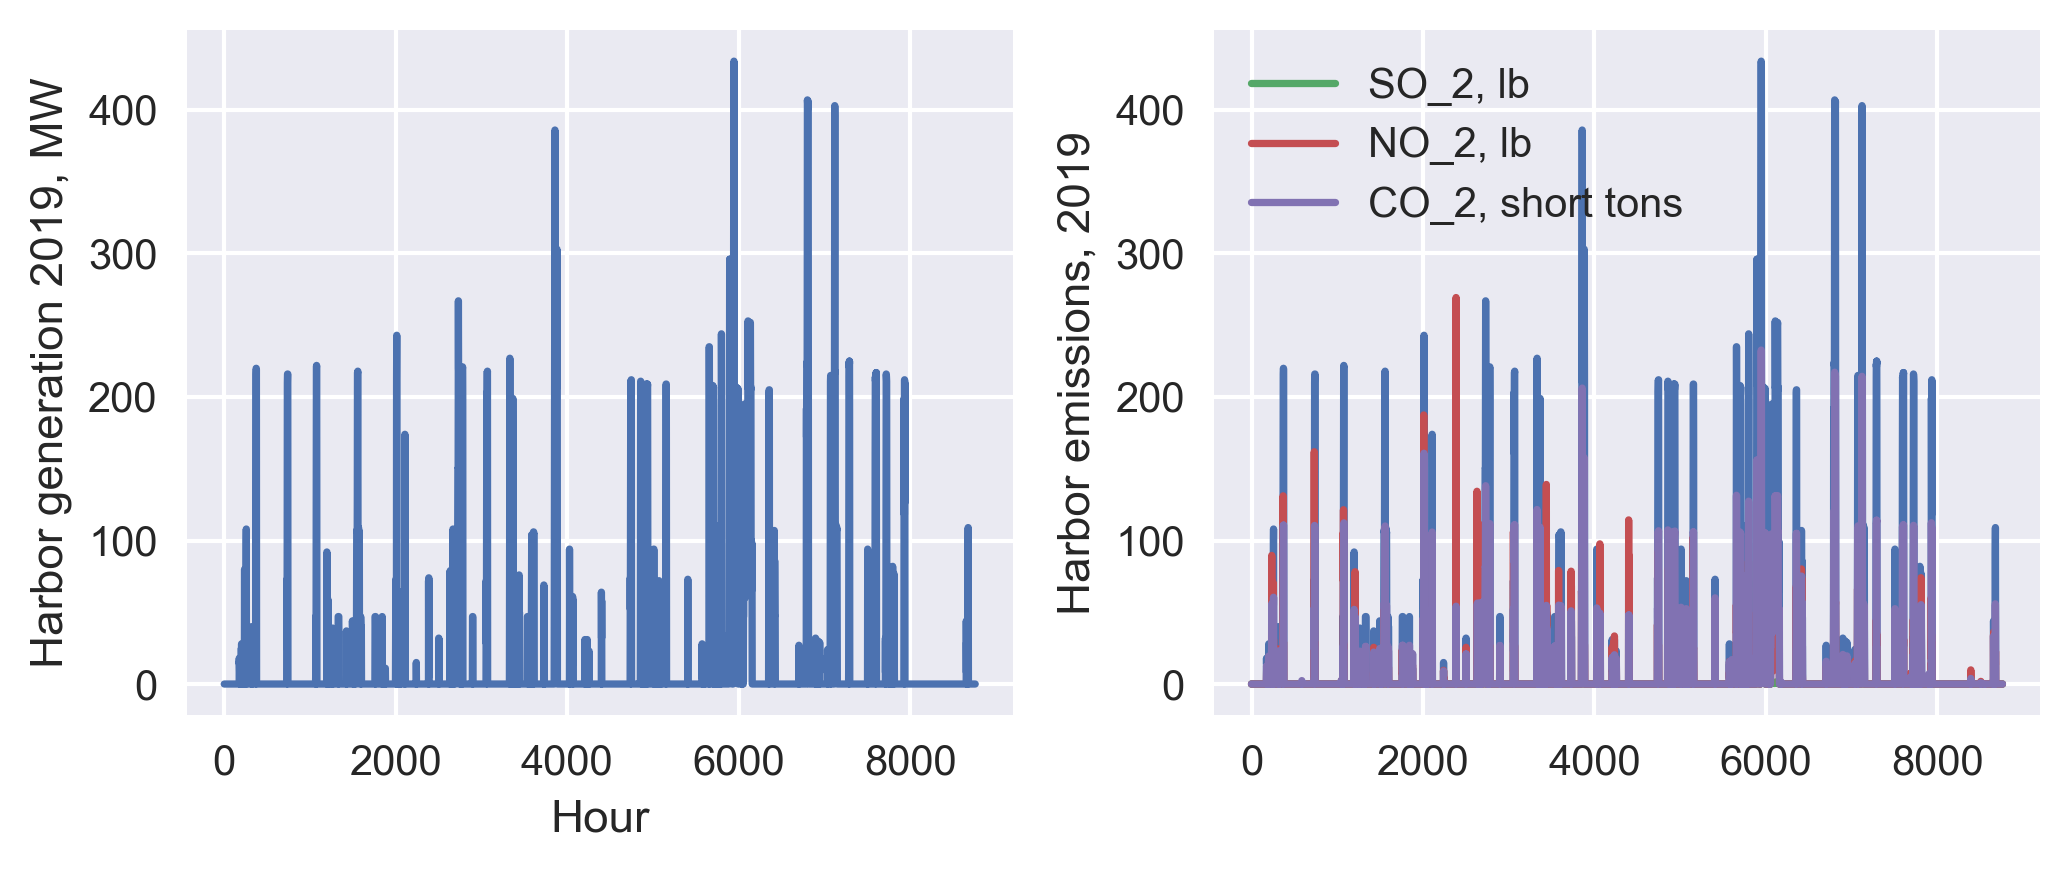

In [13]:
fig,axs = plt.subplots(1,2,figsize=(7,3),dpi=300)

############## GENERATION ##########
axs[0].plot(harbor.index,harbor["load_mw"])
axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Harbor generation 2019, MW")

############## EMISSIONS FROM HARBOR ##########
axs[1].plot(harbor.index,harbor["load_mw"])
axs[1].plot(harbor.index,harbor["so2_lb"],label = "SO_2, lb")
axs[1].plot(harbor.index,harbor["nox_lb"],label = "NO_2, lb")
axs[1].plot(harbor.index,harbor["co2_short_tons"], label = "CO_2, short tons")
axs[1].legend()
axs[1].set_ylabel("Harbor emissions, 2019")

plt.tight_layout()

In [35]:
sum(harbor["co2_short_tons"].isinf())

AttributeError: 'Series' object has no attribute 'isinf'

## Measurements of marginal emissions

In [ ]:
############## EMISSIONS DATA FROM WATT TIME ##########
fig,axs = plt.subplots(1,2,figsize=(7,3),dpi=300)
 
# Figure 1 - Map of locations of power plants

# Figure 2 - Marginal emissions
ladwp_marginal_co2
ladwp_marginal_healthdamages

## Clean energy resources
To meet the demand of the Harbor peaker power plant, there are a range of clean energy resources that can be implemented
1. Solar
2. Efficiency
3. Storage
4. Demand response

In [ ]:
fig,axs = plt.subplots(1,2,figsize(7,5),dpi=300)

########## EFFICIENCY GENERATION PROFILES ##############

########## SOLAR GENERATION PROFILES ##############

########## STORAGE ##############

########## DEMAND RESPONSE ##############

######### FIXED COSTS ##############

######### VARIABLE COSTS ##############


## System optimization for peaker power plan retirement

Here, we consider costs and benefits for the full LADWP energy supply using a levelized cost of energy (LCOE) framework. Specifically, we seek to minimize the following function.



## Model results
### Scenario 1: LADWP

### Scenario 2: Mayor of LA

### Scenario 3: Low-income

Plot types:
Capacity portfolios over time
Hourly dispatch by resource


In [ ]:
lp = harboropt_lp_storage_buildyear_projectedcosts_valueadditionalenergy.LinearProgram(build_years = 10, 
                                                                                       build_start_year = 2020,
                                                                                       storage_can_charge_from_grid = False, 
                                                                                       ee_cost_type = 'total_cost')
lp.assign_demand()
lp = lp.initialize_storage_capacity_vars(storage_df)
lp.assign_demand()
lp.Sovle()